# Results

The following notebook details the results section of the project including code used evaluate the model in the justification section and the final visualization.

## Justification

Here I evaluate the performance of the final model against the benchmarks

In [48]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [49]:
# data for analysis
eval_  = pd.read_csv('Evaluation Data.csv', index_col=0)
eval_

,Calvins Captains,Season Average,3 Week Average,Model Average
Round,,,,
6,98.2,99.8,110.6,93.2
7,114.4,121.8,110.6,109.2
8,113.0,118.0,122.2,120.4
9,131.6,113.4,117.4,129.0
10,101.0,106.8,98.6,112.2
11,115.4,107.6,113.2,113.8
12,139.6,119.8,115.0,129.4
13,93.6,105.0,106.2,104.8
14,104.8,100.8,99.0,104.0


In [50]:
# generating statistics
eval_.describe()

,Calvins Captains,Season Average,3 Week Average,Model Average
count,15.000000,15.000000,15.000000,15.000000
mean,109.653333,109.346667,109.733333,111.666667
std,14.377257,11.580147,13.929756,12.451659
min,89.600000,93.600000,77.800000,93.200000
25%,98.800000,100.300000,100.000000,101.400000
50%,113.000000,107.600000,110.600000,111.800000
75%,115.400000,118.000000,116.800000,123.400000
max,139.600000,133.400000,135.600000,129.400000


In [76]:
# construct model results using only top ranked player
cc = pd.read_csv('Calvins Captains Benchmark.csv', index_col=0)
sa = pd.read_csv('Season Average Benchmark.csv', index_col=0)
tw = pd.read_csv('3 Week Benchmark.csv', index_col=0)
ma = pd.read_csv('Model Prediction Top 5s.csv', index_col=0)

all_data = pd.DataFrame({'Calvins Captains': cc['Score'], 'Season Average': sa['Score'], '3 Week Average': 
                           tw['Score'], 'Model Average': ma['Score']})

all_data.head()

,3 Week Average,Calvins Captains,Model Average,Season Average
Round,,,,
6,60.0,108,108.0,60.0
6,155.0,100,100.0,76.0
6,76.0,125,76.0,100.0
6,100.0,82,100.0,108.0
6,162.0,76,82.0,155.0


In [77]:
top_ranked = pd.DataFrame()
for r in range(6,21):
    top_ranked = top_ranked.append(all_data.loc[r, :].iloc[0, :])
top_ranked = top_ranked.reindex_axis(['Calvins Captains','Season Average', '3 Week Average', 'Model Average'], axis=1)
top_ranked

,Calvins Captains,Season Average,3 Week Average,Model Average
6,108.0,60.0,60.0,108.0
7,167.0,65.0,65.0,65.0
8,130.0,130.0,108.0,130.0
9,126.0,126.0,177.0,177.0
10,101.0,108.0,108.0,101.0
11,131.0,118.0,118.0,118.0
12,95.0,95.0,141.0,95.0
13,100.0,74.0,100.0,74.0
14,134.0,117.0,104.0,117.0
15,78.0,135.0,132.0,135.0


In [78]:
# generate statistics
top_ranked.describe()

,Calvins Captains,Season Average,3 Week Average,Model Average
count,15.000000,15.000000,15.00000,15.000000
mean,118.866667,109.400000,110.40000,108.866667
std,24.573117,27.611592,30.20596,27.257677
min,78.000000,60.000000,60.00000,65.000000
25%,99.500000,94.500000,97.00000,91.500000
50%,126.000000,117.000000,108.00000,111.000000
75%,132.500000,130.000000,125.00000,117.500000
max,167.000000,147.000000,177.00000,177.000000


## Free Form Visualization

Below is the code used to construct the graphs used in the free form visualization section of the project report.

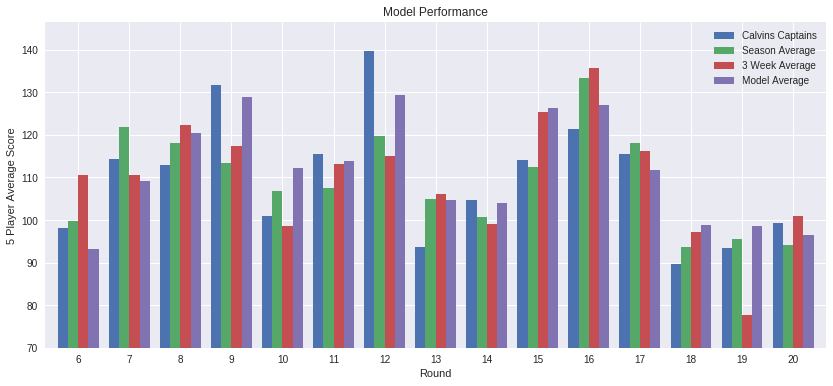

In [98]:
# visualization 1: bar graph of model performance across rounds

eval_.plot(kind='bar', width=0.8, rot='horizontal')
plt.ylabel('5 Player Average Score')
plt.title('Model Performance')
plt.ylim(ymin=70)
matplotlib.rcParams['figure.figsize'] = (14, 6)

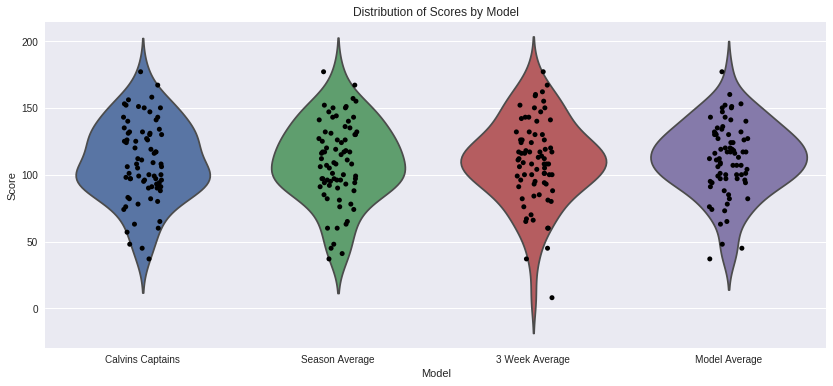

In [99]:
# visualization 2: violin plots highlighting within model distribution of scores

sns.violinplot(data=all_data, order=['Calvins Captains','Season Average', '3 Week Average', 'Model Average'], 
               inner=None)
sns.stripplot(data=all_data, jitter=True, color='Black', 
              order=['Calvins Captains','Season Average', '3 Week Average', 'Model Average'])
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Distribution of Scores by Model')